<a href="https://colab.research.google.com/github/pttrupt/EDA-on-Google-play-store-apps-/blob/main/EDA_on_applications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google Play Store Apps Exploratory Data Analysis 

ToDo - talk about EDA 

ToDo - talk about dataset(Source, information)
* Kaggle 
* information about applications 


## Download The Data


In [1]:
!pip install opendatasets --upgrade -q

In [2]:
import opendatasets as od 

download_url = 'https://www.kaggle.com/gauthamp10/google-playstore-apps'

od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: pttrupt
Your Kaggle Key: ··········


100%|██████████| 207M/207M [00:02<00:00, 74.6MB/s]


In [3]:
data_file = './google-playstore-apps/Google-Playstore.csv'

### Data Table Display 

In [4]:
pip install google.colab -q

In [5]:
from google.colab import data_table

In [6]:
data_table.enable_dataframe_formatter()

## Data Preparation and cleaning 

* Load the file using Pandas 
* Look for information about the data 
* fix incorrect values and any missing values 




In [100]:
import pandas as pd 
import numpy as np

In [40]:
df = pd.read_csv(data_file)

In [10]:
pd.options.display.max_columns = len(df.columns)

In [11]:
df.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,USD,10M,7.1 and up,Jean Confident Irénée NIYIZIBYOSE,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,USD,2.9M,5.0 and up,Webserveis,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,USD,3.7M,4.0.3 and up,Cabin Crew,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,USD,1.8M,4.0.3 and up,Climate Smart Tech2,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,USD,6.2M,4.1 and up,Rafal Milek-Horodyski,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35


In [12]:
df.shape

(2312944, 24)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   App Name           object 
 1   App Id             object 
 2   Category           object 
 3   Rating             float64
 4   Rating Count       float64
 5   Installs           object 
 6   Minimum Installs   float64
 7   Maximum Installs   int64  
 8   Free               bool   
 9   Price              float64
 10  Currency           object 
 11  Size               object 
 12  Minimum Android    object 
 13  Developer Id       object 
 14  Developer Website  object 
 15  Developer Email    object 
 16  Released           object 
 17  Last Updated       object 
 18  Content Rating     object 
 19  Privacy Policy     object 
 20  Ad Supported       bool   
 21  In App Purchases   bool   
 22  Editors Choice     bool   
 23  Scraped Time       object 
dtypes: bool(4), float64(4), int64(1), object(15)
memor

* Dataset contains 24 cloumns in which some of them need processing and filling where the observation is missing 

* Though there are also some columns which are not that much useful for Exploratory Analysis such as App Id, Developer Email, Developer Website, Privacy policy and Scraped Time so we'll drop those

In [41]:
df.drop(columns = ['App Id', 'Developer Email', 'Privacy Policy', 'Developer Website', 'Scraped Time'], inplace=True)

In [42]:
df.columns

Index(['App Name', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency',
       'Size', 'Minimum Android', 'Developer Id', 'Released', 'Last Updated',
       'Content Rating', 'Ad Supported', 'In App Purchases', 'Editors Choice'],
      dtype='object')

In [26]:
df

,App Name,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Developer Id,Developer Website,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice
0,Gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,USD,10M,7.1 and up,Jean Confident Irénée NIYIZIBYOSE,https://beniyizibyose.tk/#/,"Feb 26, 2020","Feb 26, 2020",Everyone,False,False,False
1,Ampere Battery Info,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,USD,2.9M,5.0 and up,Webserveis,https://webserveis.netlify.app/,"May 21, 2020","May 06, 2021",Everyone,True,False,False
2,Vibook,Productivity,0.0,0.0,50+,50.0,58,True,0.0,USD,3.7M,4.0.3 and up,Cabin Crew,NaN,"Aug 9, 2019","Aug 19, 2019",Everyone,False,False,False
3,Smart City Trichy Public Service Vehicles 17UC...,Communication,5.0,5.0,10+,10.0,19,True,0.0,USD,1.8M,4.0.3 and up,Climate Smart Tech2,http://www.climatesmarttech.com/,"Sep 10, 2018","Oct 13, 2018",Everyone,True,False,False
4,GROW.me,Tools,0.0,0.0,100+,100.0,478,True,0.0,USD,6.2M,4.1 and up,Rafal Milek-Horodyski,http://www.horodyski.com.pl,"Feb 21, 2020","Nov 12, 2018",Everyone,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312939,大俠客—熱血歸來,Role Playing,4.3,16775.0,"100,000+",100000.0,337109,True,0.0,USD,77M,4.1 and up,ALICE GAME,http://www.4399sy.com.hk/,NaN,"Jun 01, 2021",Teen,False,False,False
2312940,ORU Online,Education,0.0,0.0,100+,100.0,430,True,0.0,USD,44M,4.1 and up,"3Dream Studios, LLC",http://www.oru.edu/,"Jan 17, 2018","Feb 02, 2018",Everyone,False,False,False
2312941,Data Structure,Education,0.0,0.0,100+,100.0,202,True,0.0,USD,29M,5.0 and up,appoworld,NaN,"Aug 19, 2018","Aug 19, 2018",Everyone,False,False,False
2312942,Devi Suktam,Music & Audio,3.5,8.0,"1,000+",1000.0,2635,True,0.0,USD,10M,5.0 and up,Bhakti,https://a70f78905.app-ads-txt.com,"Aug 1, 2016","May 05, 2021",Everyone,True,False,False


In [156]:
df.groupby(by='Category').agg(np.mean)

,Rating,Rating Count,Minimum Installs,Maximum Installs,Free,Price,Ad Supported,In App Purchases,Editors Choice
Category,,,,,,,,,
Action,2.705979,20805.240094,6.316844e+05,1.115665e+06,0.978334,0.066425,0.810524,0.274832,0.002758
Adventure,2.814991,5724.398561,2.323428e+05,4.231656e+05,0.957505,0.179679,0.775546,0.203853,0.001595
Arcade,2.450481,4649.964464,2.695966e+05,4.774297e+05,0.985760,0.096180,0.786492,0.193282,0.000335
Art & Design,1.952354,867.182960,6.022544e+04,9.797176e+04,0.990614,0.088540,0.712929,0.045472,0.000324
Auto & Vehicles,2.049613,706.019163,8.724946e+04,1.671894e+05,0.984464,0.116733,0.255197,0.049125,0.000055
Beauty,1.434105,383.310710,3.434665e+04,6.046612e+04,0.998811,0.005127,0.506541,0.019538,0.000170
Board,2.782275,5807.571483,3.108072e+05,4.988241e+05,0.965527,0.169808,0.706460,0.235172,0.000283
Books & Reference,2.467159,662.764020,4.129430e+04,8.831964e+04,0.969185,0.193225,0.759903,0.073042,0.000069
Business,1.439082,438.409684,3.642369e+04,5.966283e+04,0.995319,0.057301,0.101933,0.021040,0.000070


In [20]:
df.describe() # returns stastical table containing statstics of numerical columns

,Rating,Rating Count,Minimum Installs,Maximum Installs,Price
count,2.290061e+06,2.290061e+06,2.312837e+06,2.312944e+06,2.312944e+06
mean,2.203152e+00,2.864839e+03,1.834452e+05,3.202017e+05,1.034992e-01
std,2.106223e+00,2.121626e+05,1.513144e+07,2.355495e+07,2.633127e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,5.000000e+01,8.400000e+01,0.000000e+00
50%,2.900000e+00,6.000000e+00,5.000000e+02,6.950000e+02,0.000000e+00
75%,4.300000e+00,4.200000e+01,5.000000e+03,7.354000e+03,0.000000e+00
max,5.000000e+00,1.385576e+08,1.000000e+10,1.205763e+10,4.000000e+02


In [47]:
df.isnull().sum()* 100 / df.shape[0]# return percentage of missing data for each column

App Name            0.000086
Category            0.000000
Rating              0.989345
Rating Count        0.989345
Installs            0.004626
Minimum Installs    0.004626
Maximum Installs    0.000000
Free                0.000000
Price               0.000000
Currency            0.005837
Size                0.008474
Minimum Android     0.282324
Developer Id        0.001427
Released            3.071972
Last Updated        0.000000
Content Rating      0.000000
Ad Supported        0.000000
In App Purchases    0.000000
Editors Choice      0.000000
dtype: float64

In [39]:
df['Developer Id'].value_counts()

Subsplash Inc                                         5422
TRAINERIZE                                            5153
ChowNow                                               4865
OrderYOYO                                             2884
Phorest                                               2821
                                                      ... 
Messenger : Text Messenger & Message by OneByZero7       1
Soft Author                                              1
Coloooooooooooooors                                      1
PT Bank Mega Syariah                                     1
Doken Edgar                                              1
Name: Developer Id, Length: 758371, dtype: int64

## Exploratory Analysis and Visualization 

In [93]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline 

### Top 10 Category in terms of total number of apps

In [143]:
### Top 10 Category in terms of total number of apps

In [136]:
cat = df['Category'].value_counts(sort=True)
cat.index

Index(['Education', 'Music & Audio', 'Tools', 'Business', 'Entertainment',
       'Lifestyle', 'Books & Reference', 'Personalization', 'Health & Fitness',
       'Productivity', 'Shopping', 'Food & Drink', 'Travel & Local', 'Finance',
       'Arcade', 'Puzzle', 'Casual', 'Communication', 'Sports', 'Social',
       'News & Magazines', 'Photography', 'Medical', 'Action',
       'Maps & Navigation', 'Simulation', 'Adventure', 'Educational',
       'Art & Design', 'Auto & Vehicles', 'House & Home',
       'Video Players & Editors', 'Events', 'Trivia', 'Beauty', 'Board',
       'Racing', 'Role Playing', 'Word', 'Strategy', 'Card', 'Weather',
       'Dating', 'Libraries & Demo', 'Casino', 'Music', 'Parenting', 'Comics'],
      dtype='object')

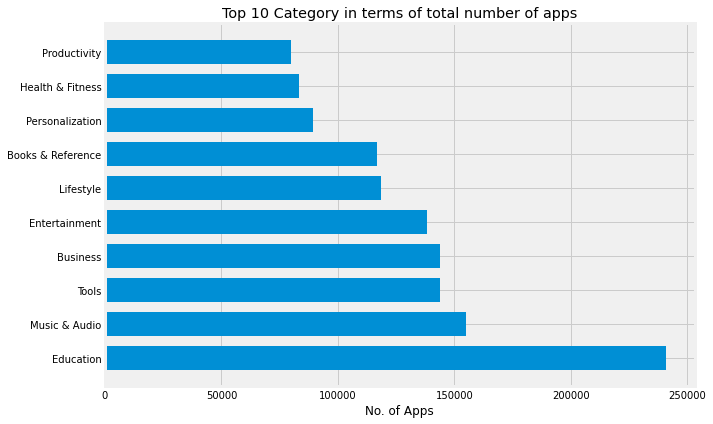

In [137]:
plt.figure(figsize=(10,6))
plt.barh(y = cat.index[:10], width=cat[:10], height=0.7)
plt.title("Top 10 Category in terms of total number of apps")
plt.xlabel("No. of Apps")
plt.tight_layout()
# plt.xticks(rotation=25)
plt.show()


### No. Editors choice apps per category 

In [149]:
editor_choice = df.groupby(by='Category')['Editors Choice'].agg(np.sum)
editor_choice.sort_values(ascending=False, inplace=True)

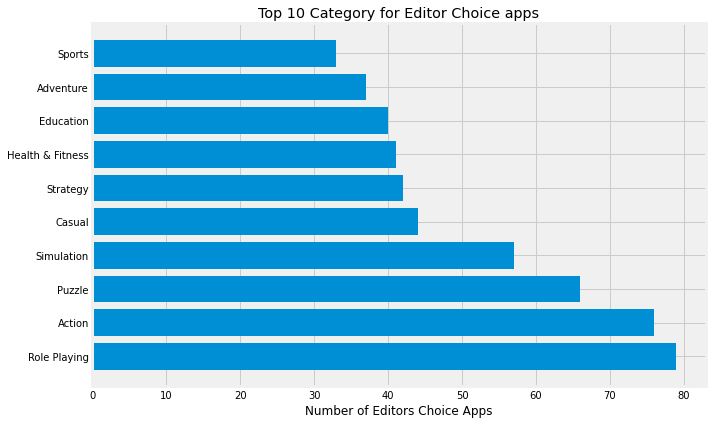

In [155]:
plt.figure(figsize=(10,6))
plt.barh(y=editor_choice.index[:10], width=editor_choice[:10])
plt.title("Top 10 Category for Editor Choice apps")
plt.xlabel("Number of Editors Choice Apps")
plt.tight_layout()
plt.show()

## Ask & Answer Question 

1. Something is not right with data column rating count because around 75% of the data below the 42 rating count ???
2. How many application category are there in dataset ??
3. Compair free apps and not free apps 
4. Which category has most paid apps ?
5. Which category has most free apps?
6. Which category apps most number of editor choice apps ?
7. Classify apps into content rating

## Summary and Conclusion